<a href="https://colab.research.google.com/github/engineercha/image-processing-study/blob/master/Convolution_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN에 관한 [유튜브 영상](https://youtu.be/14bFLvmrH84)을 보고 convolution 연산을 구현해보기로 함

변수와 함수 설명

- num2: 숫자 2를 의미하는 12x12 픽셀 
- filter2: 무작위 정수로 구성된 3x3 필터
- conv: 간단한 컨볼루션 연산을 하는 함수,
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;파라미터로 이미지, 필터를 입력하면 함수 내부에서 결과 크기를 계산함


In [3]:
import tensorflow as tf

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
type(X_train[0])

numpy.ndarray

In [6]:
X_train[0].shape

(28, 28)


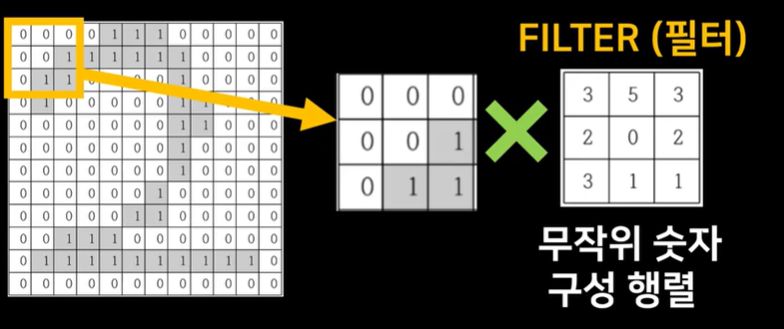


구현해볼 것은 위와 같음
- image는 12x12 크기의 array로 사진과 그대로 했고,
- filter는 3x3 크기로 random 추출함

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
num2=np.array([[0,0,0,0,1,1,1,0,0,0,0,0],
               [0,0,1,1,1,1,1,1,0,0,0,0],
               [0,1,1,0,0,0,0,1,0,0,0,0],
               [0,1,0,0,0,0,0,1,1,0,0,0],
               [0,0,0,0,0,0,0,1,1,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0],
               [0,0,0,0,0,0,1,0,0,0,0,0],
               [0,0,0,0,0,1,1,0,0,0,0,0],
               [0,0,1,1,1,0,0,0,0,0,0,0],
               [0,1,1,1,1,1,1,1,1,1,1,0],
               [0,0,0,0,0,0,0,0,0,0,0,0]])

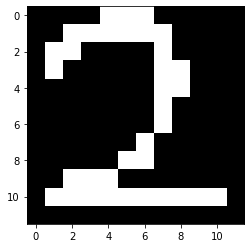

In [9]:
plt.imshow(num2, cmap='gray')

In [10]:
np.random.seed(0)
filter2=np.random.randint(0,5, size=(3,3))
filter2

array([[4, 0, 3],
       [3, 3, 1],
       [3, 2, 4]])

- 입력크기 (H,W)
- 필터크기 (FH,FW)
- 패딩 P
- 스트라이드 S

라고 할 때 출력크기 (OH,OW)는 ( (H+2P-FH)/S+1, (W+2P-FW)/S+1 )와 같음

구현할 함수는 P=0, S=1이므로 ( H-FH+1,W-FW+1 )임

In [11]:
def conv(image, filter):
    
    lst=[] #결과값을 담을 리스트

    #출력크기를 계산

    filter_size=filter.shape[0]
    result_size=image.shape[0]-filter_size+1

    #첫번째 행에서 오른쪽으로 한칸씩 이동 10번(=result_size)
    #두번째 행에서 오른쪽으로 한칸씩 이동 10번
    #열번째 행까지 반복

    for k in range(result_size):         #아래로 1칸씩 이동
        for l in range(result_size):     #오른쪽으로 1칸씩 이동
            sum=0                        #sum 초기화
            for i in range(filter_size): #같은 i행j열끼리 곱하고 sum에 더함
                for j in range(filter_size):
                    sum+=image[i+k][j+l]*filter[i][j] 
            lst.append(sum)              #결과값인 sum을 lst에 추가

    #연산결과를 담은 리스트를 array로 변환 후
    #2차원으로 변경

    lst=np.array(lst)
    lst=lst.reshape((result_size,result_size))

    return lst

In [12]:
conv(num2, filter2)

array([[ 7,  9, 13, 10, 14, 15, 12,  6,  0,  0],
       [ 9, 12, 10,  7,  7, 12, 13, 12,  3,  0],
       [ 6,  7,  4,  0,  0,  8, 10, 15,  6,  0],
       [ 0,  4,  0,  0,  0,  8,  9, 13,  7,  0],
       [ 0,  0,  0,  0,  0,  8,  8, 10,  4,  0],
       [ 0,  0,  0,  0,  4,  6,  6,  7,  0,  0],
       [ 0,  0,  0,  4,  7, 11,  6,  4,  0,  0],
       [ 4,  6,  9,  6, 10,  6,  7,  0,  0,  0],
       [ 7, 13, 16, 18, 15, 13, 13,  9,  9,  5],
       [ 7, 10, 14, 11, 11,  7,  7,  7,  7,  6]])

아래는 conv 함수를 제대로 작성한 것이 맞는지 확인하기 위해, 다른 예시를 가져왔음

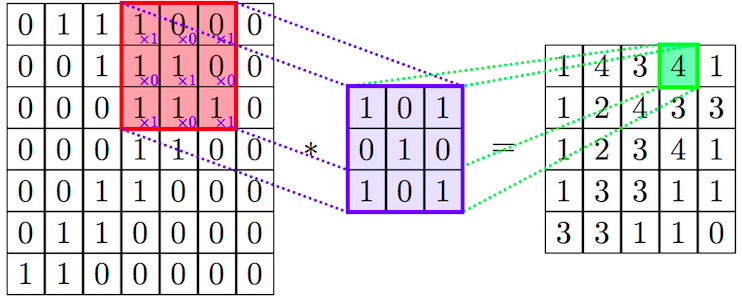

[이미지출처](https://bkshin.tistory.com/entry/OpenCV-17-%ED%95%84%ED%84%B0Filter%EC%99%80-%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98Convolution-%EC%97%B0%EC%82%B0-%ED%8F%89%EA%B7%A0-%EB%B8%94%EB%9F%AC%EB%A7%81-%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88-%EB%B8%94%EB%9F%AC%EB%A7%81-%EB%AF%B8%EB%94%94%EC%96%B8-%EB%B8%94%EB%9F%AC%EB%A7%81-%EB%B0%94%EC%9D%B4%EB%A0%88%ED%84%B0%EB%9F%B4-%ED%95%84%ED%84%B0)

In [13]:
num7=np.array([[0,1,1,1,0,0,0],
               [0,0,1,1,1,0,0],
               [0,0,0,1,1,1,0],
               [0,0,0,1,1,0,0],
               [0,0,1,1,0,0,0],
               [0,1,1,0,0,0,0],
               [1,1,0,0,0,0,0]])

filter7=np.array([[1,0,1],
                 [0,1,0],
                 [1,0,1]])

In [15]:
conv(num7, filter7)

array([[1, 4, 3, 4, 1],
       [1, 2, 4, 3, 3],
       [1, 2, 3, 4, 1],
       [1, 3, 3, 1, 1],
       [3, 3, 1, 1, 0]])

결과가 잘 나오는 것을 확인했음